# Deep Learning: Exploratory Analysis of EMA
- smoking time of day
- time to complete pending surveys
- counts of environments (smoking and nonsmoking)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
data_dir = '/Users/mme/Box Sync/deep_learning_ema/Subject Data/'

In [35]:
date_cols = [['Survey Started Date', 'Survey Started Time'],
             ['Survey Submitted Date', 'Survey Submitted Time'],
             ['Trigger Date', 'Trigger Time']]

def read_and_concatenate(search_string, parse_dates=None):
    files = glob.glob(search_string)
    frames = [pd.read_excel(f, parse_dates=parse_dates, dayfirst=True) for f in files]
    return pd.concat(frames, ignore_index=True, sort=True)

pending = read_and_concatenate(data_dir + '*/*Pending.xlsx', parse_dates=date_cols)
smoking = read_and_concatenate(data_dir + '*/*Smoking*', parse_dates=date_cols)

In [36]:
((len(pending), len(pending.columns)), (len(smoking), len(smoking.columns)))

((2718, 54), (3219, 44))

## Smoking Times

- from smoking right now + random prompts when smoking

In [37]:
pending_smok = pending[pending['When did you last use a tobacco product?'] == 'Smoking/vaping/dipping right now']
pending_non = pending[pending['When did you last use a tobacco product?'] != 'Smoking/vaping/dipping right now']

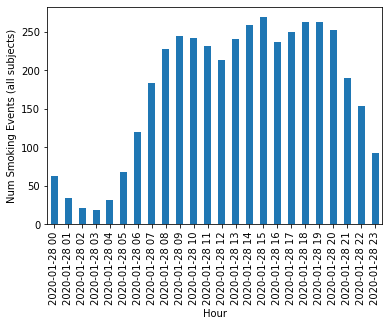

In [22]:
times = pd.concat([
    smoking['Survey Started Time'],
    pending_smok['Survey Started Time']])

times.astype(str).str.split(':').str[0].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Hour')
plt.ylabel('Num Smoking Events (all subjects)')
plt.show()

In [38]:
pending_non[['User Id', 'Survey Started Date_Survey Started Time', 
         'When did you last use a tobacco product?', 'How strong is your current urge to smoke a cigarette?',
         'How much pain do you have right now?']].to_csv('/Users/mme/Downloads/maggie_nonsmok.csv', index=False)

In [39]:
temp = pd.concat([pending_smok, smoking], axis=0, sort=True)

In [40]:
temp[['User Id', 'Survey Started Date_Survey Started Time',
      'How much pain do you have right now?']].to_csv('/Users/mme/Downloads/maggie_smok.csv', index=False)

# Time to complete pending surveys
- completion time - trigger time

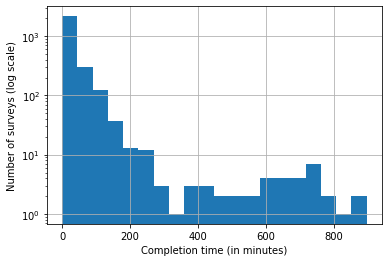

In [6]:
def to_seconds(t):
    if pd.isna(t):
        return np.nan
    return ((t.hour * 60 + t.minute) * 60) + t.second

def timedelta(t1, t2):
    return ((to_seconds(t2) - to_seconds(t1)) % (24 * 60 * 60)) / 60

tds = pending.apply(
    lambda x: timedelta(x['Trigger Time'], x['Survey Submitted Time']),
    axis=1).hist(bins=20, log=True)

plt.xlabel('Completion time (in minutes)')
plt.ylabel('Number of surveys (log scale)')
plt.show()

# Counts of Environments: Smoking & Nonsmoking
- inside/outside
- where are you
- inside place
- outside place
- smoking allowed

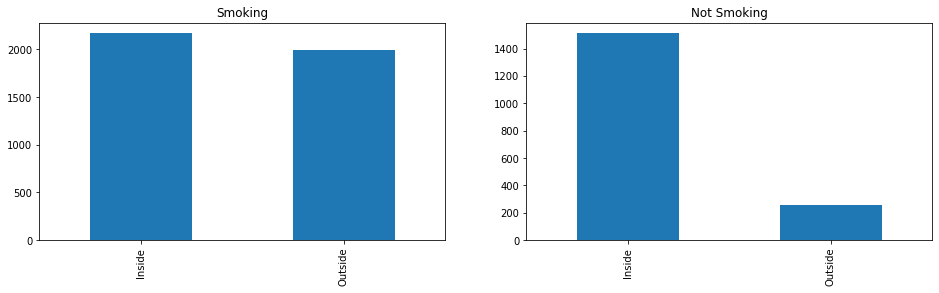

In [7]:
def value_counts_smok_non(col):
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    pd.concat([pending_smok[col], smoking[col]]).value_counts().drop(
        'CONDITION_SKIPPED', errors='ignore').sort_index().plot(kind='bar', ax=ax[0])
    ax[0].set_title('Smoking')
    pending_non[col].value_counts().drop(
        'CONDITION_SKIPPED', errors='ignore').sort_index().plot(kind='bar', ax=ax[1])
    ax[1].set_title('Not Smoking')
    plt.show()

value_counts_smok_non('Are you inside or outside?')

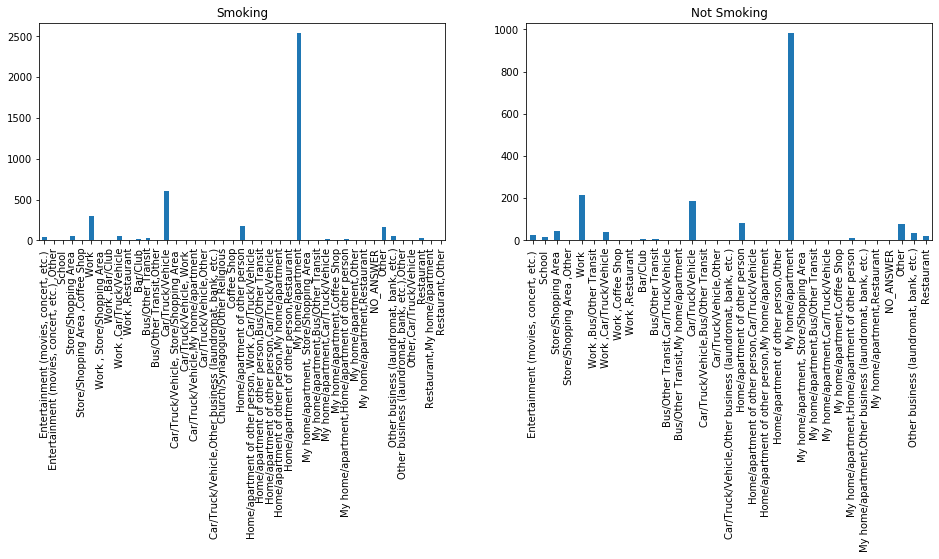

In [8]:
value_counts_smok_non('Where are you?')

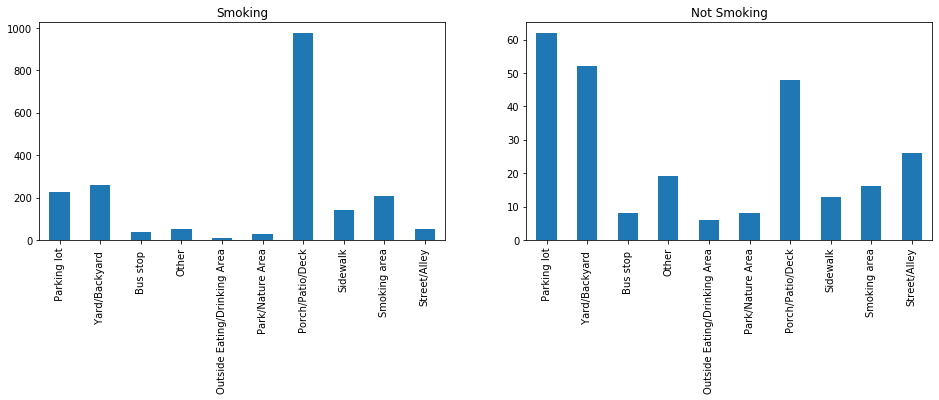

In [9]:
value_counts_smok_non('What kind of outside place?')

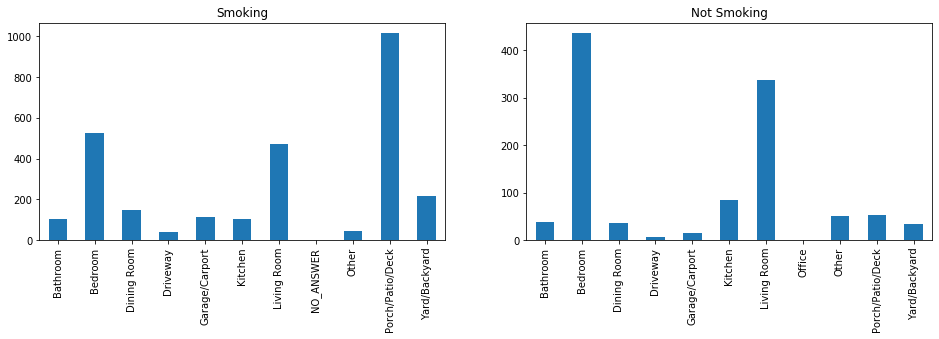

In [10]:
value_counts_smok_non('What room/area are you in?')

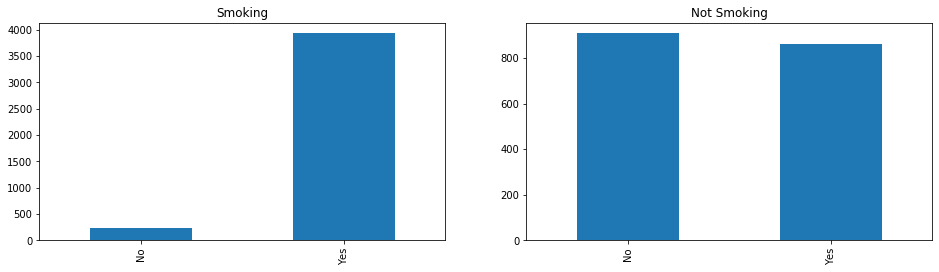

In [11]:
value_counts_smok_non('Is smoking allowed in your present location?')